In [ ]:
#모듈 임포트!
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_row', 500)

In [ ]:
raw_data = sns.load_dataset('titanic')
print(raw_data.head(50))

    survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0          0       3    male  22.0      1      0    7.2500        S   Third   
1          1       1  female  38.0      1      0   71.2833        C   First   
2          1       3  female  26.0      0      0    7.9250        S   Third   
3          1       1  female  35.0      1      0   53.1000        S   First   
4          0       3    male  35.0      0      0    8.0500        S   Third   
5          0       3    male   NaN      0      0    8.4583        Q   Third   
6          0       1    male  54.0      0      0   51.8625        S   First   
7          0       3    male   2.0      3      1   21.0750        S   Third   
8          1       3  female  27.0      0      2   11.1333        S   Third   
9          1       2  female  14.0      1      0   30.0708        C  Second   
10         1       3  female   4.0      1      1   16.7000        S   Third   
11         1       1  female  58.0      0      0   2

In [ ]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [ ]:
#결측치 확인
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 생존 여부 검증 accurancy / 이중분류

In [ ]:
print(raw_data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
#age 컬럼 결측치를 평균치로 대체
raw_data['age'] = raw_data['age'].fillna(raw_data['age'].median())

raw_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [162]:
#불필요한 컬럼 제거
#target 값인 survived, 동승한 가족들 수인 sibsp, parch, 탑승지인 embarked, embarked_town
#alive, 클래스와 일맥상통하다고 생각되는 fare, deck 컬럼 제거, 성별과 중복되는 who 제거
esta_data = raw_data.drop(['survived', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'deck', 'embark_town', 'alive', 'who', 'alone'], axis=1)

esta_data.head()

,pclass,sex,age,adult_male
0,3,male,22.0,True
1,1,female,38.0,False
2,3,female,26.0,False
3,1,female,35.0,False
4,3,male,35.0,True


In [163]:
print(esta_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    object 
 2   age         891 non-null    float64
 3   adult_male  891 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 21.9+ KB
None


### 왜 안 될까? 이건

In [164]:
#범주 데이터인 성별을 숫자로 인코딩
# esta_data['sex'] = esta_data['sex'].map({'female':0, 'male':1})

# esta_data.head()

In [165]:
#라벨 인코더를 이용하여 숫자 데이터로 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sex = le.fit_transform(esta_data['sex'])
esta_data['sex'] = sex

esta_data.head()

,pclass,sex,age,adult_male
0,3,1,22.0,True
1,1,0,38.0,False
2,3,0,26.0,False
3,1,0,35.0,False
4,3,1,35.0,True


In [166]:
# bool값 처리
esta_data.applymap(lambda x: 1 if x else 0)

esta_data.head()

,pclass,sex,age,adult_male
0,3,1,22.0,True
1,1,0,38.0,False
2,3,0,26.0,False
3,1,0,35.0,False
4,3,1,35.0,True


In [167]:
#training_data / target_data 설정

training_data = esta_data

target = raw_data['survived']

print(training_data.head())
print('------------------------')
print(target.head())

   pclass  sex   age  adult_male
0       3    1  22.0        True
1       1    0  38.0       False
2       3    0  26.0       False
3       1    0  35.0       False
4       3    1  35.0        True
------------------------
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [169]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#정규화
scaled_data = scaler.fit_transform(training_data)

#데이터프레임화
column_names = ('pclass', 'sex', 'age', 'adult_male')
scaled_data = pd.DataFrame(scaled_data, columns = column_names)

print(scaled_data.head())

     pclass       sex       age  adult_male
0  0.827377  0.737695 -0.565736    0.811922
1 -1.566107 -1.355574  0.663861   -1.231645
2  0.827377 -1.355574 -0.258337   -1.231645
3 -1.566107 -1.355574  0.433312   -1.231645
4  0.827377  0.737695  0.433312    0.811922


In [170]:
#트레이닝 데이터와 테스트 데이터 분류
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size = 0.3)

#분류된 데이터 크기 확인
print('X_train shape : ', X_train.shape)
print('Y_train shape : ', Y_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_test shape : ', Y_test.shape)

X_train shape :  (623, 4)
Y_train shape :  (623,)
X_test shape :  (268, 4)
Y_test shape :  (268,)


# 모델1

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#모델 생성
model = Sequential()

#은닉층 및 드랍아웃 레이어 추가
model.add(Dense(512, input_dim = 4, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)               

In [174]:
#모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['binary_accuracy'])

#모델 학습
fit_hist = model.fit(X_train, Y_train, batch_size = 100, epochs = 100, validation_split = 0.2)

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.2206 - binary_accuracy: 0.6867 - val_loss: 0.1757 - val_binary_accuracy: 0.8000
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1615 - binary_accuracy: 0.7811 - val_loss: 0.1511 - val_binary_accuracy: 0.8000
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1450 - binary_accuracy: 0.7892 - val_loss: 0.1533 - val_binary_accuracy: 0.8160
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1381 - binary_accuracy: 0.7912 - val_loss: 0.1854 - val_binary_accuracy: 0.7040
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1391 - binary_accuracy: 0.7952 - val_loss: 0.1842 - val_binary_accuracy: 0.6960
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1346 - binary_accuracy: 0.8072 - val_loss: 0.1643 - val_binary_accuracy: 0.7440
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.13

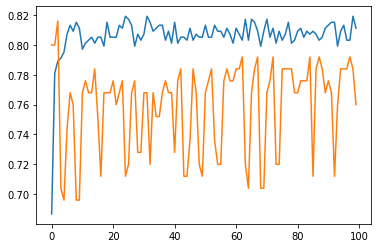

In [175]:
#시각화
import matplotlib.pyplot as plt

plt.plot(fit_hist.history['binary_accuracy'])

plt.plot(fit_hist.history['val_binary_accuracy'])

plt.show()

In [176]:
#학습하지 않은 데이터로 정확도 확인
score = model.evaluate(X_test, Y_test, verbose = 0)
#verbose 0으로 설정 시 진행상황 출력 X


print('Keras DNN model loss : ', score[0])
print('Keras DNN model accuracy : ', score[1])

Keras DNN model loss :  0.12962454557418823
Keras DNN model accuracy :  0.8022388219833374


# 모델2

In [177]:
#모델 생성
model = Sequential()

#은닉층 및 드랍아웃 레이어 추가
model.add(Dense(200, input_dim = 4, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 200)               1000      
_________________________________________________________________
dropout_48 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_49 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_50 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 1)               

In [178]:
#모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['binary_accuracy'])

#모델 학습
fit_hist = model.fit(X_train, Y_train, batch_size = 50, epochs = 50, validation_split = 0.2)

Epoch 1/50
10/10 [==============================] - 1s 19ms/step - loss: 0.2115 - binary_accuracy: 0.7590 - val_loss: 0.1740 - val_binary_accuracy: 0.8000
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.1615 - binary_accuracy: 0.7871 - val_loss: 0.1495 - val_binary_accuracy: 0.8080
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1435 - binary_accuracy: 0.7932 - val_loss: 0.1526 - val_binary_accuracy: 0.8080
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1346 - binary_accuracy: 0.7932 - val_loss: 0.1733 - val_binary_accuracy: 0.6960
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1397 - binary_accuracy: 0.7871 - val_loss: 0.1678 - val_binary_accuracy: 0.7040
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1332 - binary_accuracy: 0.7952 - val_loss: 0.1666 - val_binary_accuracy: 0.6960
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1

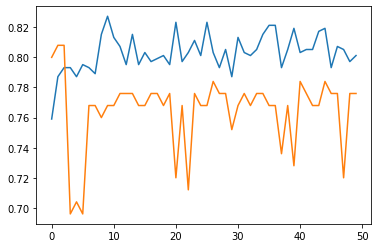

In [179]:
#시각화
import matplotlib.pyplot as plt

plt.plot(fit_hist.history['binary_accuracy'])

plt.plot(fit_hist.history['val_binary_accuracy'])

plt.show()

In [180]:
#학습하지 않은 데이터로 정확도 확인
score = model.evaluate(X_test, Y_test, verbose = 0)
#verbose 0으로 설정 시 진행상황 출력 X


print('Keras DNN model loss : ', score[0])
print('Keras DNN model accuracy : ', score[1])

Keras DNN model loss :  0.12932810187339783
Keras DNN model accuracy :  0.8022388219833374


#모델 3